<img src='https://drive.google.com/uc?export=download&id=1ma7j_2Pn7HG8hlhxUmKk5ZeWVqYJ6OnU' width="800" height ="" />



## **Fastcampus 마케팅 분석**

Fastcampus 판매 데이터를 통해 어느 콘텐츠(강의)가 잘 팔리는지, 

금액과 판매 시기에 대한 분석을 통해 마케팅 전략을 세우기

### **Fastcampus 데이터 설명**
- Fastcampus의 거래 내역들의 정보를 담고 있는 데이터이다. 
- 많은 데이터들이 공유가 불가해서 전처리 과정을 거쳐야 한다. 

**Columns 정보**
- id : 해당 거래내역에 대한 ID (PK)		
- customer_id : 결제한 고객 ID		
- course_id : 강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다
- type : 거래의 종류		
- state : 거래에 대한 상태		
- course_title :강의 제목		
- category_title : 대분류		
- format : 온라인 강의의 기획 종류		
- completed_at : state가 COMPLETED로 변경된 시점, 결제완료가 된 시점		
- transaction_amount : 최종 결제 금액		
- coupon_title : 쿠폰 종류		
- coupon_discount_amount : 쿠폰 할인 금액		
- sale_price : 판매 금액	
- tax_free_amount : 보안상 공유가 힘든 column이기에 삭제 		
- pg : PG사 종류		
- method : 결제 방식		
- subcategory_title : 중분류		
- marketing_start_at : 강의 판매 시점

**사용가능한 정보들**
- type 
  - payment : 결제
  - refund : 환불
- state 
  - COMPLETED : 결제 완료 
  - REQUESTED : 고객에게 결제 요청 


## **데이터와 라이브러리 불러오기** 

In [2]:
# 한글폰트를 사용하기 위해 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,248 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import matplotlib.dates as mdates
import datetime
import warnings

%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/공유용/파이널프로젝트_RAW_210329_210926.xlsx")

## **데이터 전처리**

- 우선 결제완료가된 사람들을 주로 분석을 하기로 했습니다.
- state가 COMPLETED이고 type이 PAYMENT인 데이터들을 pay 변수에 저장을 하였고 결제가 완료된 사람들의 데이터를 불러왔습니다
- state가 COMPLETED이고 type이 REFUND인 데이터들은 ref 변수에 저장하여 환불을 한 사람들의 데이터를 불러왔습니다

In [ ]:
# 결제가 완료된 사람들
pay = df[(df.state=='COMPLETED')&(df.type=='PAYMENT')]

# 환불이 완료된 사람들
ref = df[(df.state=='COMPLETED')&(df.type=='REFUND')]

In [ ]:
pay.to_excel('/content/drive/MyDrive/Colab Notebooks/공유용/mini_pjt_B-opy.xlsx', index=False)

In [ ]:
ref.to_excel('/content/drive/MyDrive/Colab Notebooks/공유용/mini_pjt_B-opy_ref.xlsx', index=False)

In [2]:
pay = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/공유용/mini_pjt_B-opy.xlsx')

### **결측치 처리**

In [ ]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52902 entries, 2 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      52902 non-null  float64       
 1   customer_id             52902 non-null  float64       
 2   course_id               50922 non-null  float64       
 3   type                    52902 non-null  object        
 4   state                   52902 non-null  object        
 5   course_title            52901 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52901 non-null  object        
 8   completed_at            52902 non-null  datetime64[ns]
 9   transaction_amount      52902 non-null  float64       
 10  coupon_title            23761 non-null  object        
 11  coupon_discount_amount  23761 non-null  float64       
 12  sale_price              51833 non-null  float

In [ ]:
pay.isna().sum()

id                            0
customer_id                   0
course_id                  1980
type                          0
state                         0
course_title                  1
category_title                3
format                        1
completed_at                  0
transaction_amount            0
coupon_title              29141
coupon_discount_amount    29141
sale_price                 1069
tax_free_amount            1069
pg                         9872
method                        0
subcategory_title          9435
marketing_start_at         9344
dtype: int64

In [ ]:
pay.loc[pay['category_title'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
47361,1117129.0,549990.0,NaN,PAYMENT,COMPLETED,NaN,NaN,NaN,2021-06-02 16:48:37,10500000.0,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
72639,1212937.0,591404.0,NaN,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-12 23:38:42,990000.0,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT
74975,1223480.0,598011.0,NaN,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-18 12:31:01,990000.0,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT


In [ ]:
ref.loc[ref['category_title'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
41878,1078156.0,62566.0,NaN,REFUND,COMPLETED,프로모션 : 자유이용권 (3월),NaN,온라인,2021-05-26 22:06:00,-199000.0,NaN,NaN,199000.0,199000.0,NaN,TRANSFER,NaN,NaT


In [ ]:
## 결측치 처리

# 보안상의 이유로 공개불가한 column이라 삭제
pay = pay.drop('tax_free_amount', 1)

# coupon_title이 빈상태인 사람들을 쿠폰을 사용안한것으로 간주하여 '사용안함'을 채워넣음
pay['coupon_title'].fillna('사용안함', inplace=True)

# coupon_discount_amount가 비어있는 사람들을 사용안한것으로 간주하여 0.0을 채워넣음
pay['coupon_discount_amount'].fillna(0.0,inplace=True)

# pg가 비어있는 사람들을 다른 결제 방법으로 결제 한것으로 간주하여 'ETC'를 채워넣음
pay['pg'].fillna('ETC', inplace=True)

# 빈 데이터가 너무 많아서 삭제 id=117129
pay.drop(index=47361, axis=0, inplace=True)

# sale_price가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
pay['sale_price'].replace('', np.nan, inplace=True)
pay.dropna(subset=['course_id'], inplace=True)

# course_id가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
pay['course_id'].replace('', np.nan, inplace=True)
pay.dropna(subset=['sale_price'],inplace=True)

# 카테고리가 없는것으로 간주해서 '해당없음'으로 채워넣음
pay['category_title'].fillna('해당없음', inplace=True)

# transcation_amount가 0, sale_price값이 1 인 항목들은 전부 셈플 강의거나 테스트용이었으므로 삭제
pay = pay.loc[(pay.sale_price!=1.0)&(pay.transaction_amount!=0)]

In [ ]:
# 'subcategory_title' 결측치를 'course_title' 키워드에 따라 채워줌
pay.loc[(pay.course_title.str.contains('영상') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '영상 편집'
pay.loc[(pay.course_title.str.contains('프론트엔드') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
pay.loc[(pay.course_title.str.contains('딥러닝') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('모바일앱') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '모바일앱'
pay.loc[(pay.course_title.str.contains('개발자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('백엔드') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('인공지능') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('PPT') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
pay.loc[(pay.course_title.str.contains('보고서') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
pay.loc[(pay.course_title.str.contains('DevOps') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'DevOps'
pay.loc[(pay.course_title.str.contains('UX/UI') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'UX/UI'
pay.loc[(pay.course_title.str.contains('모션그래픽') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '모션그래픽'
pay.loc[(pay.course_title.str.contains('업무자동화') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '업무자동화'
pay.loc[(pay.course_title.str.contains('SNS') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'SNS마케팅'
pay.loc[(pay.course_title.str.contains('디지털 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('그로스 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('데이터 기반') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('마케팅 한끝세트') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('마케팅 백과사전') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('풀스택 마케터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('개인화 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('마테크') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('B2B') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'B2B'
pay.loc[(pay.course_title.str.contains('마케팅 벼락치기') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('게임개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임'
pay.loc[(pay.course_title.str.contains('게임 제작') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임'
pay.loc[(pay.course_title.str.contains('게임 디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
pay.loc[(pay.course_title.str.contains('모델링') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
pay.loc[(pay.course_title.str.contains('부동산 투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
pay.loc[(pay.course_title.str.contains('부동산 디벨로퍼') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
pay.loc[(pay.course_title.str.contains('부동산 재테크') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
pay.loc[(pay.course_title.str.contains('부동산 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
pay.loc[(pay.course_title.str.contains('엑셀') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '엑셀/VBA'
pay.loc[(pay.course_title.str.contains('데이터분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('시각디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '시각디자인'
pay.loc[(pay.course_title.str.contains('재무제표') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('자금조달') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('금융ㆍ투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
pay.loc[(pay.course_title.str.contains('재무/세무') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('회계') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('포토샵&일러스트레이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
pay.loc[(pay.course_title.str.contains('일러스트') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '일러스트'
pay.loc[(pay.course_title.str.contains('VFX') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'VFX'
pay.loc[(pay.course_title.str.contains('웹 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('컴퓨터 공학') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('투자의 정석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[(pay.course_title.str.contains('마스터 코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
pay.loc[(pay.course_title.str.contains('기업분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[(pay.course_title.str.contains('클론코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
pay.loc[(pay.course_title.str.contains('ADsP') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('풀스택 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('개발 풀스택') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('웹 프로그래밍') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('데이터 사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('리팩터링') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('마케터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '마케터'
pay.loc[(pay.course_title.str.contains('SQL') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('HTML/CSS') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
pay.loc[(pay.course_title.str.contains('코딩+알고리즘') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('자연어') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('앱개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('파이썬 자동화') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('비즈니스 영어') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
pay.loc[(pay.course_title.str.contains('스피치 10분컷') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
pay.loc[(pay.course_title.str.contains('디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
pay.loc[(pay.course_title.str.contains('알고리즘') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('Financial Modeling') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('Spring') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터베이스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('데이터사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('파이썬') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('객체지향') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('React') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터기반') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터 사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('데이터 분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('빅데이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('금융/투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
pay.loc[(pay.course_title.str.contains('기업투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[pay.subcategory_title.isnull(),'subcategory_title'] = '기타'

In [ ]:
# index 재정렬
pay.reset_index(inplace=True)
ref.reset_index(inplace=True)

In [ ]:
pay.isna().sum()

id                           0
customer_id                  0
course_id                    0
type                         0
state                        0
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
pg                           0
method                       0
subcategory_title            0
marketing_start_at        5302
dtype: int64

## **데이터 분석**

### 콘텐츠 기획 분석

* 사람들은 어떤 콘텐츠를 많이 구매할까? : 카테고리, 서브카테고리, 포맷
* 마케팅 효과가 있는가? 
* 특정 그룹의 상품이 효과가 있는가?

#### 카테고리 분석

In [ ]:
pay['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠'],
      dtype=object)

In [ ]:
pd.DataFrame(pay['category_title'].value_counts())

,category_title
프로그래밍,14302
업무 생산성,6130
데이터사이언스,5881
디자인,5386
영상/3D,4860
마케팅,4241
부동산/금융,2574
투자/재테크,1357
크리에이티브,321
교육,49


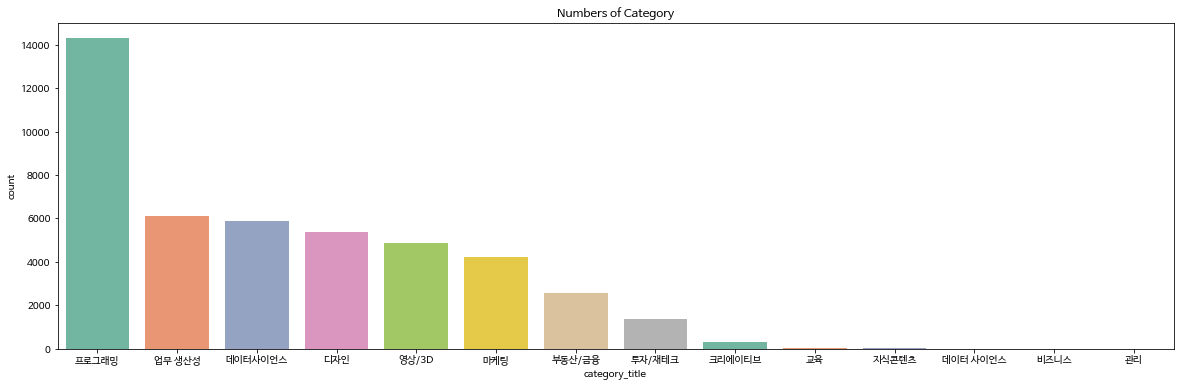

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=pay, x='category_title', order = pay['category_title'].value_counts().index, palette='Set2')
plt.title('Numbers of Category')
plt.show()

카테고리를 분석해봤을때 프로그래밍 과목을 수강하는 사람들이 압도적으로 많은걸 볼 수 있다 

In [ ]:
# '데이터사이언스'가 아닌 '데이터 사이언스' 카테고리 체크 
# 관리자가 공백을 붙여서 따로 분류되는걸로 예상 
pay[pay['category_title']=='데이터 사이언스']

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
17165,47407,1117146,4340.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 18:26:18,310000,사용안함,0.0,310000.0,PAYCO,CARD,데이터분석,2021-05-21
17179,47448,1117311,549527.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:17:25,310000,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21
17185,47462,1117346,274620.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:32:30,310000,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21
17188,47477,1117420,550126.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 21:06:23,310000,사용안함,0.0,310000.0,KAKAO,POINT,데이터분석,2021-05-21
17193,47509,1117539,238166.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 22:31:51,310000,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21


In [ ]:
pay[pay['course_title'].str.contains('SQL 100제')].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
3009,7871,992871,474939.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-05 12:22:59,390000,사용안함,0.0,390000.0,ETC,CARD,데이터분석,2021-04-05
3122,8223,993961,389482.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-06 00:22:22,390000,사용안함,0.0,390000.0,ETC,CARD,데이터분석,2021-04-05
3156,8320,994302,389482.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-06 11:18:22,312000,[20% 할인] 완주반 1주년 기념 쿠폰,78000.0,390000.0,ETC,CARD,데이터분석,2021-04-05
3685,9728,998971,15551.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-08 17:45:58,312000,[20% 할인] 완주반 1주년 기념 쿠폰,78000.0,390000.0,INICIS,CARD,데이터분석,2021-04-05
3843,10157,1000599,488865.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-09 13:20:03,312000,[완주반 1주년 기념 20% 할인 쿠폰],78000.0,390000.0,INICIS,CARD,데이터분석,2021-04-05


같은 course_title에 '데이터사이언스' 카테고리를 가진 과목이 있는걸로 봐서 관리자가 category_title을 잘못 입력하는 실수를 했다고 보여진다

In [ ]:
# category title이 '데이터 사이언스'인것들을 '데이터사이언스'로 수정
pay.loc[pay['category_title']=='데이터 사이언스' , 'category_title'] = '데이터사이언스'

In [ ]:
pay['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '비즈니스', '지식콘텐츠'], dtype=object)

#### 서브 카테고리 분석

In [ ]:
pay['subcategory_title'].unique()

array(['프론트엔드 개발', 'PPT/보고서', '영상 편집', '회계/재무/세무', 'DevOps', 'UX/UI',
       '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅', '데이터분석', '디지털마케팅',
       '엑셀/VBA', '모바일앱', '업무자동화', 'SNS마케팅', '백엔드 개발', '게임', '개발자 커리어',
       '부동산 개발', '시각디자인', '데이터마케팅', '디자인툴', '금융/투자 실무', '코딩 입문', '기타',
       '커뮤니케이션', '부동산 투자', 'B2B', '리더십', '일러스트', '주식 투자', '마케터', '게임 그래픽',
       '데이터엔지니어링', 'VFX'], dtype=object)

In [ ]:
pd.DataFrame(pay['subcategory_title'].value_counts())

,subcategory_title
영상 편집,3417
프론트엔드 개발,3136
개발자 커리어,3117
백엔드 개발,2984
데이터분석,2482
엑셀/VBA,2286
딥러닝/인공지능,2266
PPT/보고서,2140
디자인툴,1865
모바일앱,1697


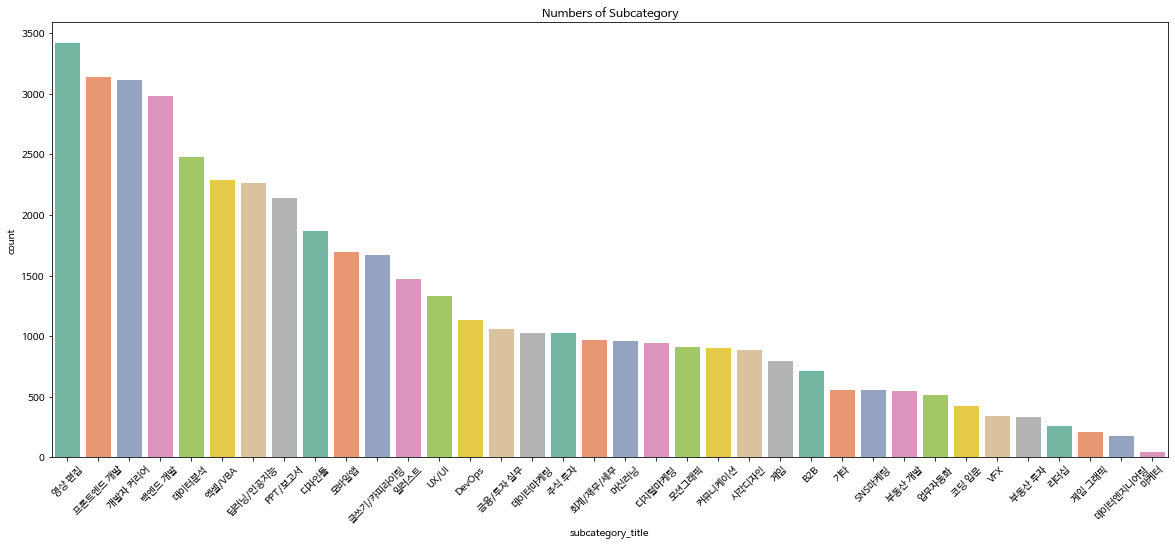

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=pay, x='subcategory_title', order = pay['subcategory_title'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Numbers of Subcategory')
plt.show()

서브 카테고리를 분석 해봤을때 영상편집 강의 수강자 수가 제일 많고


그 다음으로 프로그래밍 과목들 (백엔드 개발, 개발자 커리어, 프론트엔드 개발, 딥러닝/인공지능)의 수강자 수가 많은 것으로 분석이 된다

In [ ]:
pd.DataFrame(pay.pivot_table(index=['category_title','subcategory_title'], aggfunc='size'))

0
category_title subcategory_title      
관리             기타                    1
교육             B2B                  49
데이터사이언스        B2B                   1
               데이터분석              2480
               데이터엔지니어링            176
               딥러닝/인공지능           2266
               머신러닝                963
디자인            UX/UI              1244
               디자인툴               1782
               시각디자인               889
               일러스트               1471
마케팅            SNS마케팅              553
               글쓰기/카피라이팅          1668
               기타                    4
               데이터마케팅             1027
               데이터분석                 1
               디지털마케팅              943
               마케터                  45
부동산/금융         개발자 커리어               2
               금융/투자 실무           1058
               부동산 개발              546
               엑셀/VBA                2
               회계/재무/세무            966
비즈니스           기타                    2
               엑셀/VBA                1
               커뮤니케이션                2
업무 생산성         PPT/보고서            2140
               기타                   94
               리더십                 255
               업무자동화               458
               엑셀/VBA             2283
               커뮤니케이션              900
영상/3D          VFX                 339
               게임 그래픽              210
               모션그래픽               902
               영상 편집              3409
지식콘텐츠          기타                   22
크리에이티브         B2B                   2
               UX/UI                83
               기타                  215
               디자인툴                  4
               모션그래픽                 9
               영상 편집                 8
투자/재테크         부동산 투자              333
               주식 투자              1024
프로그래밍          B2B                 660
               DevOps             1130
               개발자 커리어            3115
               게임                  798
               기타                  220
               데이터분석                 1
               디자인툴                 79
               모바일앱               1697
               백엔드 개발             2984
               업무자동화                57
               코딩 입문               425
               프론트엔드 개발           3136

큰 카테고리에서는 프로그래밍을 듣는 사람들이 제일 많은것으로 보이고 서브 카테고리 중에서는 영상/3D의 영상편집을 듣는 사람이 제일 많다

그러므로 프로그래밍 과목들과 영상 편집을 위주로 마케팅을 하면 효과를 볼수 있을것으로 보여진다


#### format 분석

In [ ]:
pay['format'].unique()

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '캠프', '이벤트',
       '하루10분컷', '아카이브', '관리', 'B2B', 'MBA', 'B2G'], dtype=object)

In [ ]:
pd.DataFrame(pay['format'].value_counts())

,format
올인원,38151
RED,3109
온라인 완주반,1350
하루10분컷,1327
B2B,352
스쿨 온라인,328
B2G,310
이벤트,82
B2B 온라인,52
아카이브,31


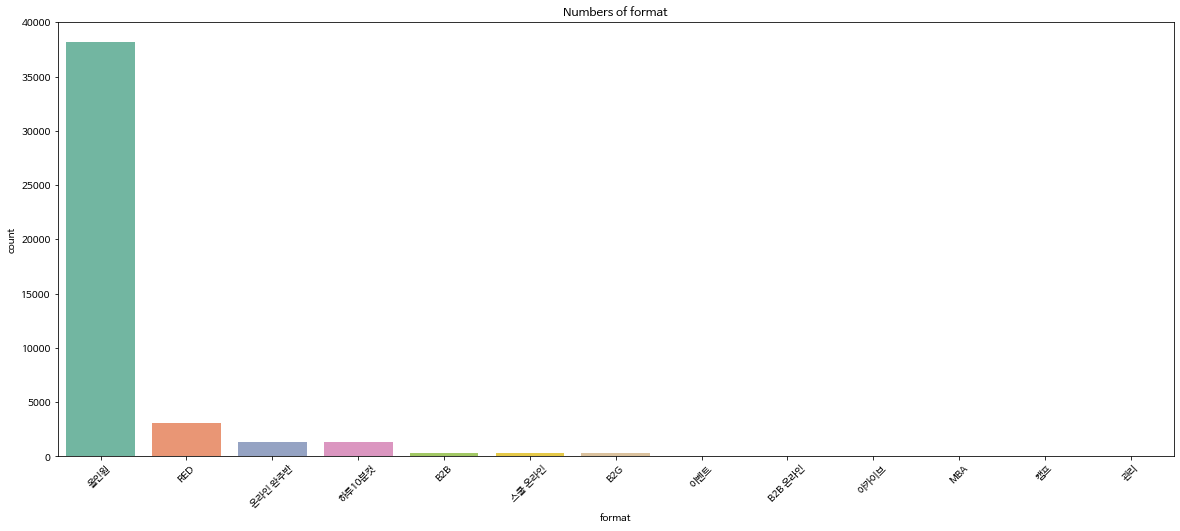

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=pay, x='format', order = pay['format'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Numbers of format')
plt.show()

올인원 format이 압도적으로 많은것으로 보아 사람들은 한번 결제에 여러가지 강의가 들어있는것을 선호하는 타입인것 같다 

마케팅 방향을 올인원을 광고하는것으로 잡아서 하는게 판매율을 높을 수있을것 같다


#### 마케팅의 효과 분석

In [ ]:
# 마케팅이 시작된 시기 분석
pd.DataFrame(pay['marketing_start_at'].dt.strftime('%Y년 %m월').value_counts())

,marketing_start_at
2021년 04월,5144
2021년 02월,4728
2021년 06월,4229
2021년 07월,3758
2020년 12월,3567
2021년 03월,2097
2021년 05월,1979
2021년 08월,1704
2021년 01월,1558
2020년 03월,1279


In [ ]:
# 결제 완료 시간을 월별로 나눠서 분석
pd.DataFrame(pay['completed_at'].dt.strftime('%Y년 %m월').value_counts())

,completed_at
2021년 08월,8435
2021년 05월,7647
2021년 06월,7499
2021년 04월,7435
2021년 07월,7394
2021년 09월,4845
2021년 03월,1879


*   2019년과 2020년에는 마케팅 횟수가 적고 2021년 2월부터 크게 증가해서 4월부터 증가해서 8월까지는 판매수가 많아진걸로 보여진다
*   2021년 9월에는 마케팅 횟수가 현저히 떨어졌기때문에 9월 판매수가 떨어진것으로 보인다

### 시기별 분석

### 금액별 분석

#### 쿠폰 이외 할인 분석



*   transaction_amount 금액별 조사



In [ ]:
pay['transaction_amount'].value_counts()

99000     891
119000    855
129000    817
149000    806
159000    781
         ... 
477000      1
184775      1
388000      1
111800      1
347650      1
Name: transaction_amount, Length: 1267, dtype: int64

In [ ]:
pay[pay.transaction_amount == 0].value_counts()

Series([], dtype: int64)

In [ ]:
ref['transaction_amount'].value_counts()

-99000     82
-129000    76
-299000    75
-30000     70
-119000    63
           ..
-109494     1
-302000     1
-402000     1
-302333     1
-108186     1
Name: transaction_amount, Length: 798, dtype: int64


*   type = PAYMENT 에서는 전부 0 이상 이므로 전부 할인 받은 고객은 없다.




In [ ]:
# 할인 금액 확인
pay['discount'] = pay['sale_price'] - pay['transaction_amount']
pay.head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,discount
0,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,프론트엔드 개발,2021-03-04 00:00:00,19090.0
1,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14 00:00:00,20000.0
2,8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02 00:00:00,20000.0
3,10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,사용안함,0.0,263000.0,ETC,CARD,회계/재무/세무,2020-11-27 00:00:00,0.0
4,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02 00:00:00,20000.0


In [ ]:
# 쿠폰 외 할인 금액 확인
p_dc = pd.DataFrame(pay.loc[(pay.coupon_title == '사용안함')&(pay.discount != 0), 'discount'].value_counts())
p_dc.head()

,discount
20000.0,30
10000.0,21
30000.0,17
180000.0,5
3800.0,2


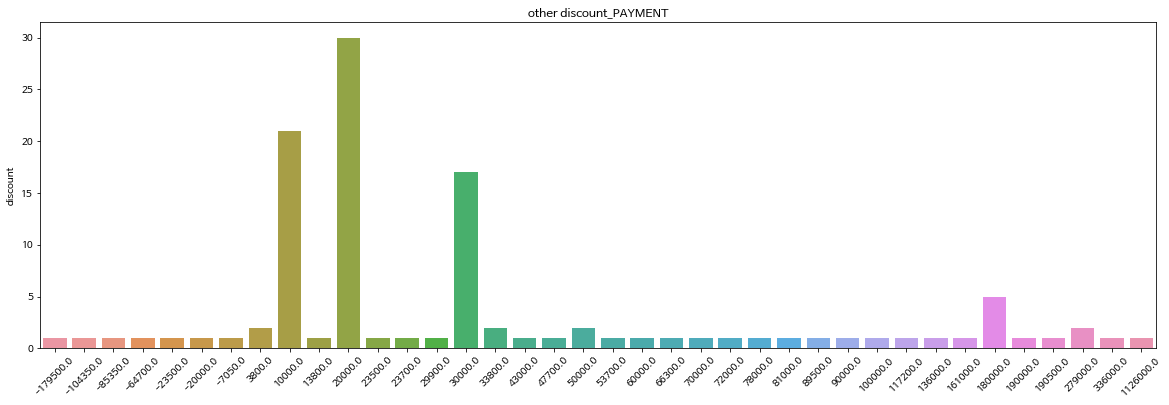

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=p_dc,
            x = p_dc.index,
            y = p_dc.discount)
plt.xticks(rotation=45)
plt.title('other discount_PAYMENT')
plt.show()

In [ ]:
# 할인 금액 확인
ref['discount'] = ref['sale_price'] + ref['transaction_amount']
ref.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,discount
651,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,사용안함,0.0,404000.0,ETC,VBANK,NaN,NaT,257000.0
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,사용안함,0.0,116000.0,ETC,CARD,영상 편집,2020-12-02,20000.0
666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,사용안함,0.0,89000.0,ETC,CARD,일러스트,2021-02-19,10000.0
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,사용안함,0.0,340000.0,ETC,VBANK,NaN,2021-03-08,0.0
676,972440,469406.0,202547.0,REFUND,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-03-29 09:48:29,-125000,사용안함,0.0,145000.0,ETC,CARD,금융/투자 실무,2020-04-17,20000.0


In [ ]:
# 쿠폰 외 할인 금액 확인
ref.loc[(ref.coupon_title == '사용안함')&(ref.discount != 0), 'discount'].value_counts()

20000.0     472
10000.0     325
30000.0     239
50000.0      50
111300.0     12
           ... 
40500.0       1
14242.0       1
26000.0       1
29469.0       1
5814.0        1
Name: discount, Length: 452, dtype: int64



*   케이스가 적어서 분석의 의미가 없다.
*   거의 모든 고객이 쿠폰으로 강좌를 구매한다.



### 강의별 분석

In [ ]:
 # 기업,정부 고객 삭제
pay_p = pay.loc[(pay['format']!= 'B2B')&(pay['format']!='B2B 온라인')&(pay['format']!='B2G')]
pay_p['format'].value_counts()

올인원        38151
RED         3109
온라인 완주반     1350
하루10분컷      1327
스쿨 온라인       328
이벤트           82
아카이브          31
MBA           22
캠프            19
관리             1
Name: format, dtype: int64

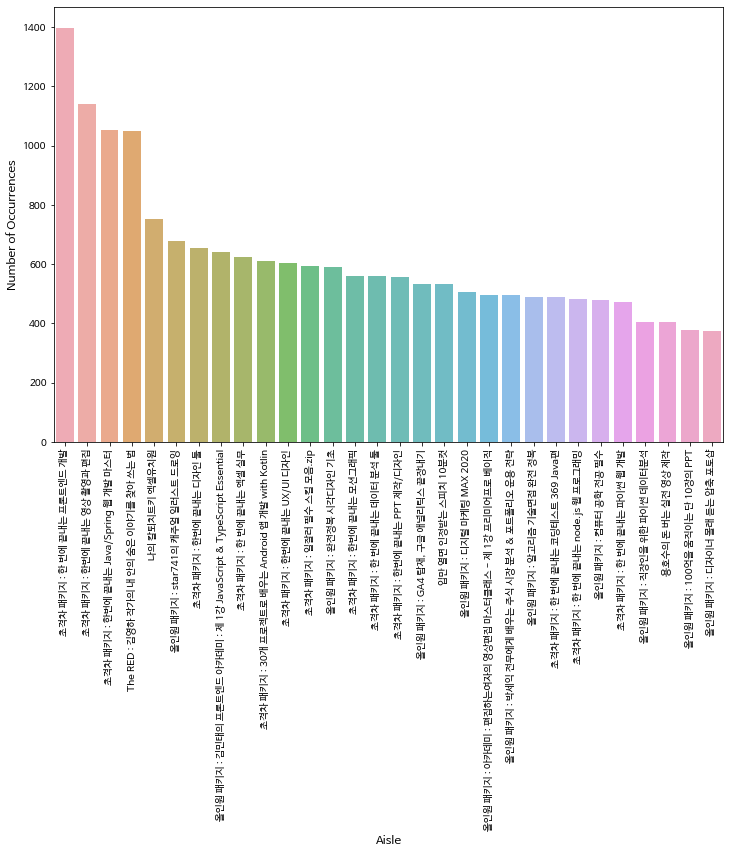

In [ ]:
cnt_crs = pay_p['course_title'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(cnt_crs.index, cnt_crs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# course_title 중 300회 이상 결제된 강의들 목록
pay_ct = pd.DataFrame(pay_p['course_title'].value_counts())
pay_ct.loc[(pay_ct.course_title > 300) & (pay_ct.index.str.contains('B2B') == False) ]


,course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,1398
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,1139
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,1052
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,1050
나의 칼퇴치트키 엑셀유치원,751
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,678
초격차 패키지 : 한번에 끝내는 디자인 툴,654
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,639
초격차 패키지 : 한 번에 끝내는 엑셀 실무,623
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,609


In [ ]:
pay_ct_st = pd.DataFrame(pay_p.loc[:,['course_title','subcategory_title']].value_counts())

pay_ct_st[(pay_ct_st[0] > 300)]

,,0
course_title,subcategory_title,
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프론트엔드 개발,1398
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상 편집,1139
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,백엔드 개발,1052
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,글쓰기/카피라이팅,1050
나의 칼퇴치트키 엑셀유치원,엑셀/VBA,751
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,일러스트,678
초격차 패키지 : 한번에 끝내는 디자인 툴,디자인툴,654
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,프론트엔드 개발,639
초격차 패키지 : 한 번에 끝내는 엑셀 실무,엑셀/VBA,623


* 개인 고객에게는 최신 트랜드의 프로그래밍과 영상,디자인 관련 상품 들이 패키지 상품으로서 많이 팔린다. 
 * ex) 프론트앤드, 딥러닝, 웹/앱개발,데이터분석, UX/UI, 모션그래픽 등
* 회사 실무나 투자에 도움이 되는 상품들이 많이 팔린다.
 * ex) 필수스킬,엑셀, 글쓰기, 스피치, 주식 시장 분석, 부동산, 돈 버는 등

In [ ]:
#환불 고객 강의명

In [ ]:
pay_p

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,프론트엔드 개발,2021-03-04 00:00:00
1,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14 00:00:00
2,8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02 00:00:00
3,10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,사용안함,0.0,263000.0,ETC,CARD,회계/재무/세무,2020-11-27 00:00:00
4,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23 00:00:00
45130,105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,사용안함,0.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02 00:00:00
45131,105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31 00:00:00
45132,105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 00:00:00


In [ ]:
#  같은 강좌 재구매자
pay_re = pay_p.groupby(['course_title','subcategory_title', 'customer_id'])['id'].aggregate("count").reset_index()
pay_re = pay_re[(pay_re['id'] >= 2)]
pay_re

,course_title,subcategory_title,customer_id,id
93,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,백엔드 개발,405129.0,2
309,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터분석,389482.0,2
319,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터분석,488865.0,2
744,The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천,개발자 커리어,525974.0,2
1247,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,글쓰기/카피라이팅,570589.0,2
...,...,...,...,...
42368,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상 편집,598842.0,2
42902,컴퓨터 공학 전공자 따라잡기 온라인 완주반 3기,개발자 커리어,478514.0,2
42988,코딩+알고리즘 온라인 완주반 6기,개발자 커리어,392815.0,2
42990,코딩+알고리즘 온라인 완주반 6기,개발자 커리어,464463.0,2


In [ ]:
pay_re_cnt = pay_re.groupby(['course_title','subcategory_title'])['customer_id'].aggregate("count").reset_index()
pay_re_cnt.sort_values(by='customer_id', ascending = False).head(30)

,course_title,subcategory_title,customer_id
106,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프론트엔드 개발,10
107,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,백엔드 개발,9
86,초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,모바일앱,9
18,스프링 아카데미아,기타,7
56,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,주식 투자,7
58,올인원 패키지 : 부동산 디벨로퍼,부동산 개발,6
113,초격차 패키지 : 한번에 끝내는 모션그래픽,모션그래픽,6
108,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,PPT/보고서,6
97,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터분석,6
3,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,글쓰기/카피라이팅,6


* 재구매율이 높은 강좌들은 취업 보다는 자기계발이나 직무관련 강좌가 많아보인다. 이것은 직장인들이 구매했다가 수강기간을 놓쳐서 다시 구매해서 듣는 것으로 보인다. 

* 또한 비교적 베스트셀러 강좌들과 겹치는 것으로 보아 수강기간을 놓쳤더라도 인기가 있어야 재구매율이 높은 것으로 보인다.

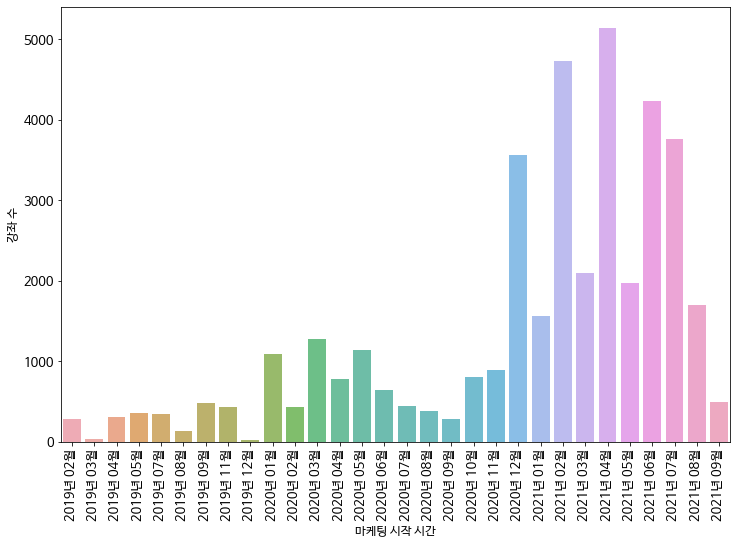

In [17]:
pay['order_day'] = pay['marketing_start_at'].dt.strftime('%Y년 %m월')
pay_day = pay.groupby(["order_day"])["id"].aggregate("count").reset_index()


plt.figure(figsize=(12,8))
sns.barplot(pay_day.order_day, pay_day.id, alpha=0.8)
plt.ylabel('강좌 수', fontsize=12)
plt.xlabel('마케팅 시작 시간', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

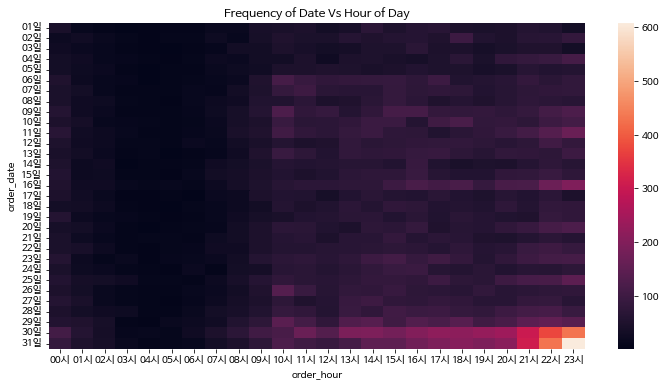

In [ ]:
pay_p['order_hour'] = pay_p['completed_at'].dt.strftime('%H시')
pay_p['order_date'] = pay_p['completed_at'].dt.strftime('%d일')
pay_time = pay_p.groupby(["order_date", "order_hour"])["id"].aggregate("count").reset_index()

pay_time = pay_time.pivot('order_date', 'order_hour', 'id')

plt.figure(figsize=(12,6))
sns.heatmap(pay_time)
plt.title("Frequency of Date Vs Hour of Day")
plt.show()

In [ ]:
pay_re = pd.DataFrame(pay_p.loc[:,['customer_id','course_title','subcategory_title']].value_counts())
pay_re[(pay_re[0] >= 2)]

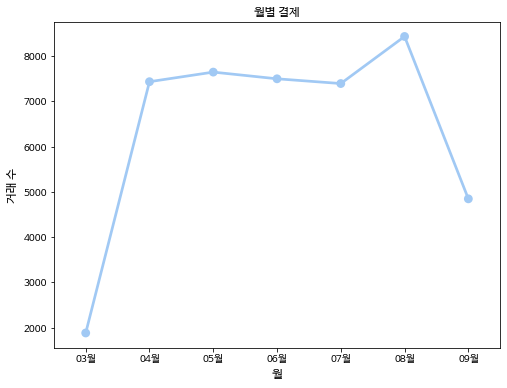

In [ ]:
pay['order_month'] = pay['completed_at'].dt.strftime('%m월')
pay_month = pay.groupby(["order_month"])["id"].aggregate("count").reset_index()

plt.figure(figsize=(8,6))
sns.pointplot(pay_month['order_month'], pay_month['id'])
plt.ylabel('거래 수', fontsize=12)
plt.xlabel('월', fontsize=12)
plt.title('월별 결제')
plt.show()